In [19]:
import numpy as np
import pandas as pd
from datetime import datetime
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dateutil.relativedelta import relativedelta, MO

In [20]:
df = pd.read_csv(
    'LD2011_2014.txt',
    delimiter = ';',
    header = 0,
    low_memory = False,
    decimal = ','
    ).rename(columns = {'Unnamed: 0': 'Datetime'}) # read the data delimited by ';', decimals with ','

df.Datetime = pd.to_datetime(df.Datetime) # turn datetime strings in to timestamps

for time_attribute in ['year', 'month', 'week', 'day']: # add attributes for year, month, week, day
    exec("df['{}'] = df.Datetime.apply(lambda x: x.{})".format(time_attribute, time_attribute))

In [23]:
weekly_usage = df.drop( # put data in long pivot form, then group by year and week
    columns = ['Datetime', 'month', 'day']
    ).melt(
        id_vars = ['year', 'week'], var_name = 'account'
    )
weekly_usage = df.drop( # put data in long pivot form, then group by year and week
    columns = ['Datetime', 'month', 'day']
    ).melt(
        id_vars = ['year', 'week'], var_name = 'account'
    )
weekly_usage.value = weekly_usage.value/4 # convert 15-min values to kWh
weekly_usage = weekly_usage.groupby(['year', 'week', 'account'], as_index = False).sum() # sum up total kWh by account, week

start_year = min(weekly_usage.year)
weekly_usage['t'] = (weekly_usage.year-start_year)*52 + weekly_usage.week # convert year, week to t = 1,2,...

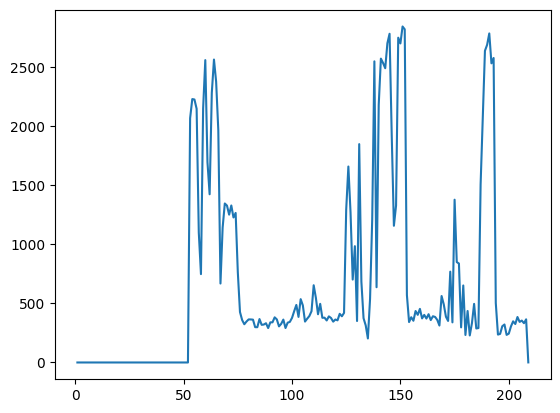

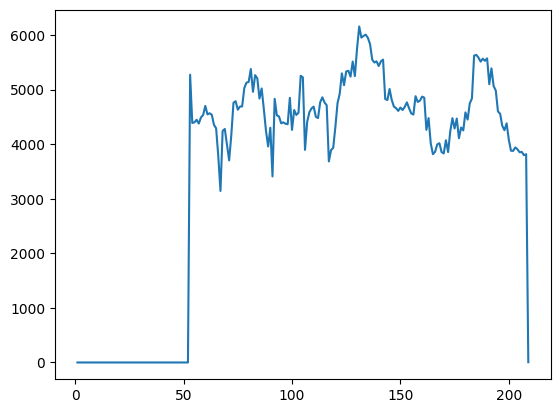

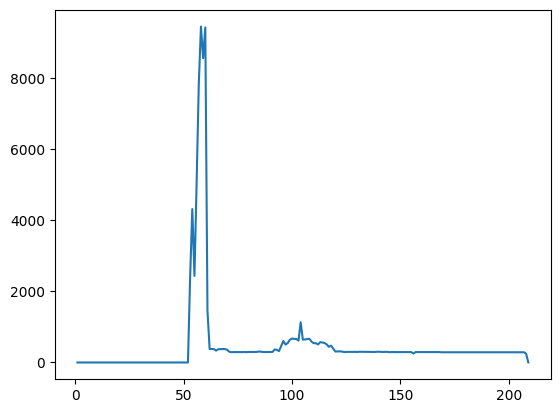

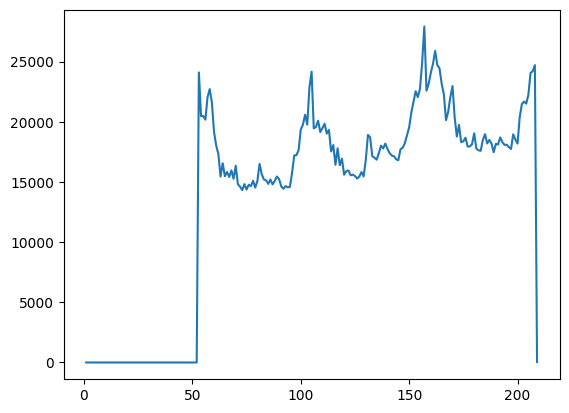

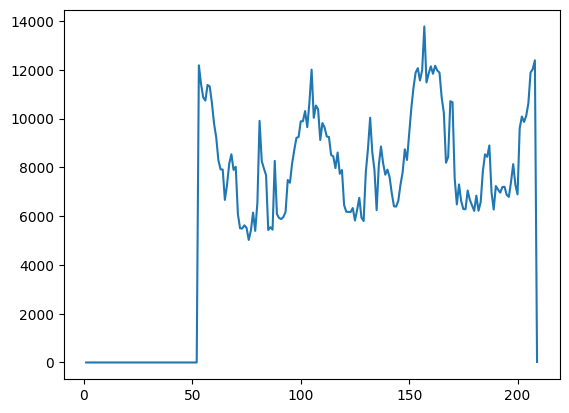

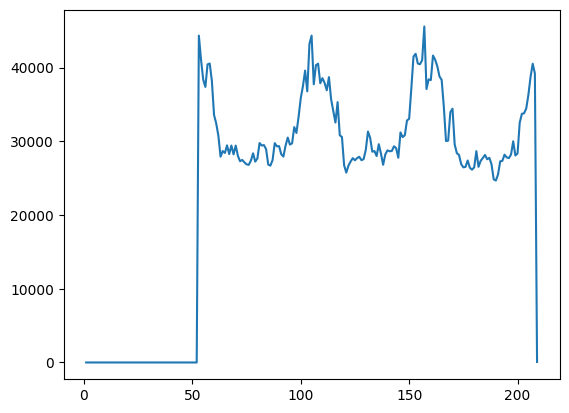

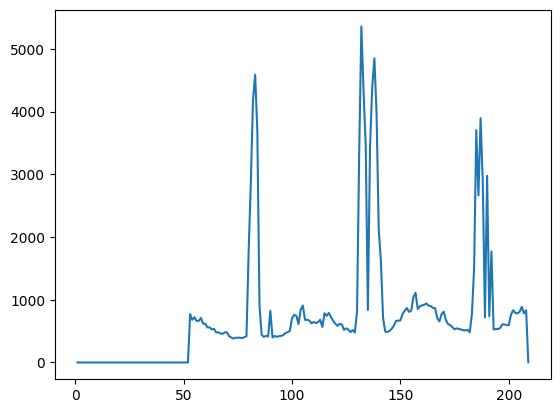

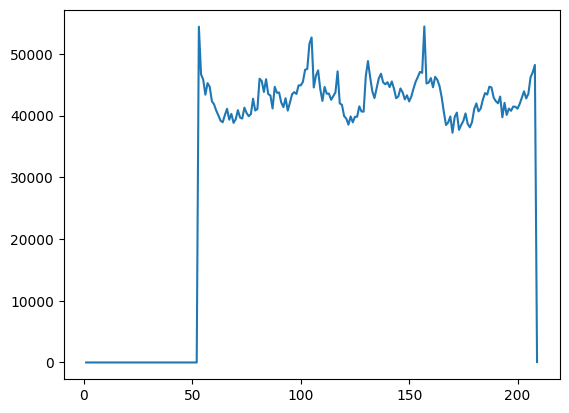

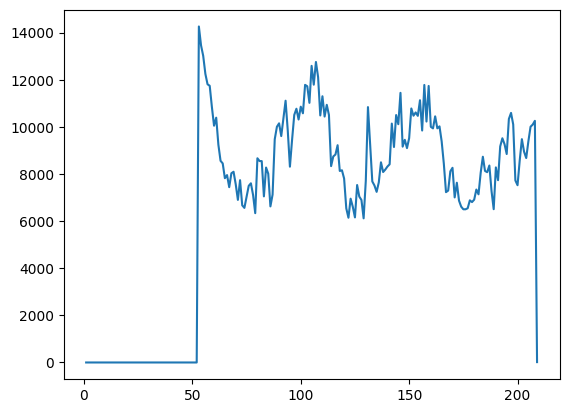

In [24]:
for acct in weekly_usage.account.unique()[0:9]:
    plt.plot(weekly_usage.t[weekly_usage.account == acct], weekly_usage.value[weekly_usage.account == acct])
    plt.show()

In [25]:
#weekly_usage.to_csv('weekly_usage.csv')